In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [20]:
Kyphosis_df =pd.read_csv('Kyphosis.csv')

In [21]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [5]:
Kyphosis_df.tail(10)

,Kyphosis,Age,Number,Start
71,absent,127,4,12
72,absent,87,4,16
73,absent,206,4,10
74,absent,11,3,15
75,absent,178,4,15
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6
80,absent,36,4,13


In [22]:
Kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [23]:
Kyphosis_df['Age'].mean()

np.float64(83.65432098765432)

In [24]:
Kyphosis_df['Age'].max()

np.int64(206)

In [25]:
Kyphosis_df['Age'].min()

np.int64(1)

In [26]:
Kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


In [27]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [12]:
#To convert absent/present to binary we will use sklearn library
#Escalation by labelencoder and onehotencoder
#Both are basically Machine learning libraries.

In [28]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
LabelEncoder_y = LabelEncoder()
Kyphosis_df['Kyphosis'] = LabelEncoder_y.fit_transform(Kyphosis_df['Kyphosis'])

In [29]:
Kyphosis_df

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15
...,...,...,...,...
76,1,157,3,13
77,0,26,7,13
78,0,120,2,13
79,1,42,7,6


In [30]:
Kyphosis_True = Kyphosis_df[Kyphosis_df['Kyphosis']==1]

In [31]:
print(Kyphosis_df.columns)

Index(['Kyphosis', 'Age', 'Number', 'Start'], dtype='object')


In [32]:
Kyphosis_False = Kyphosis_df[Kyphosis_df['Kyphosis']==0]

In [33]:
print( 'Disease present after operation percentage = ', (len(Kyphosis_True) / len(Kyphosis_df))*100, "%")

Disease present after operation percentage =  20.98765432098765 %


<Axes: >

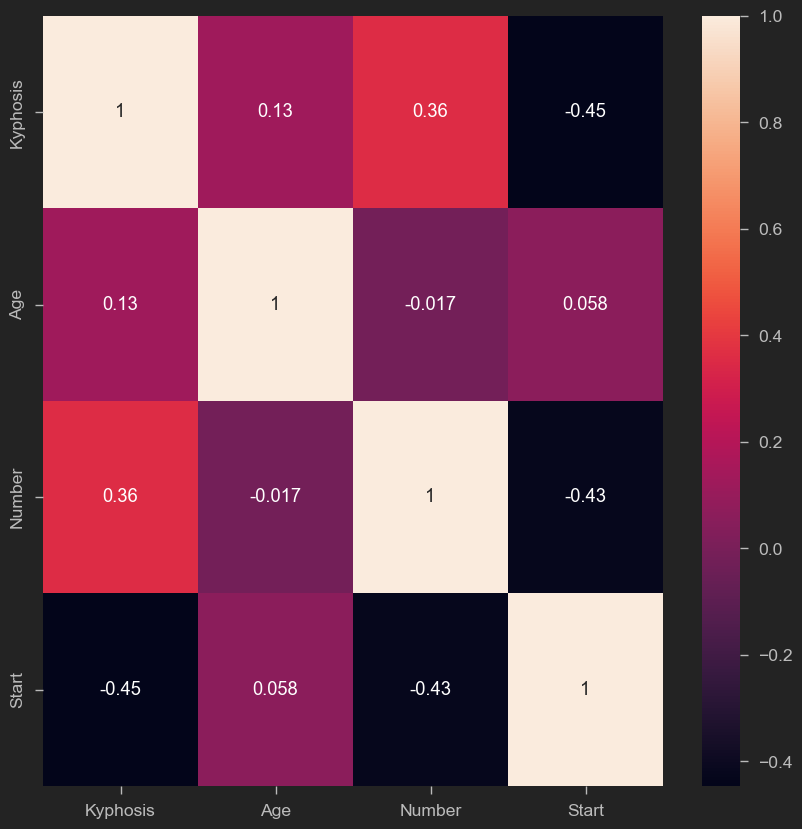

In [34]:
plt.figure(figsize=(10,10))
sns.heatmap(Kyphosis_df.corr(), annot = True)

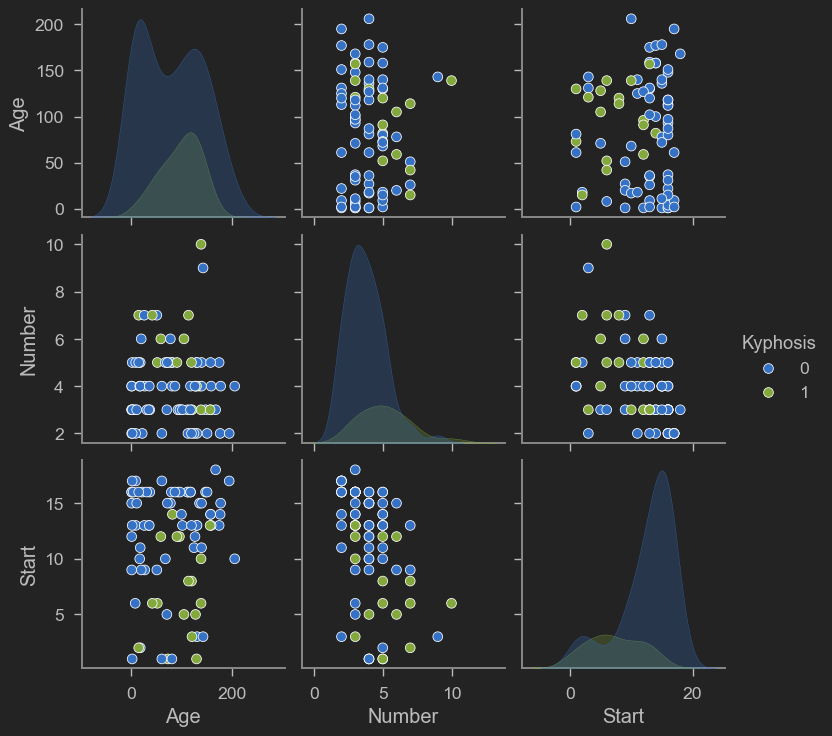

In [35]:
sns.pairplot(Kyphosis_df, hue='Kyphosis')

<Axes: xlabel='Kyphosis', ylabel='count'>

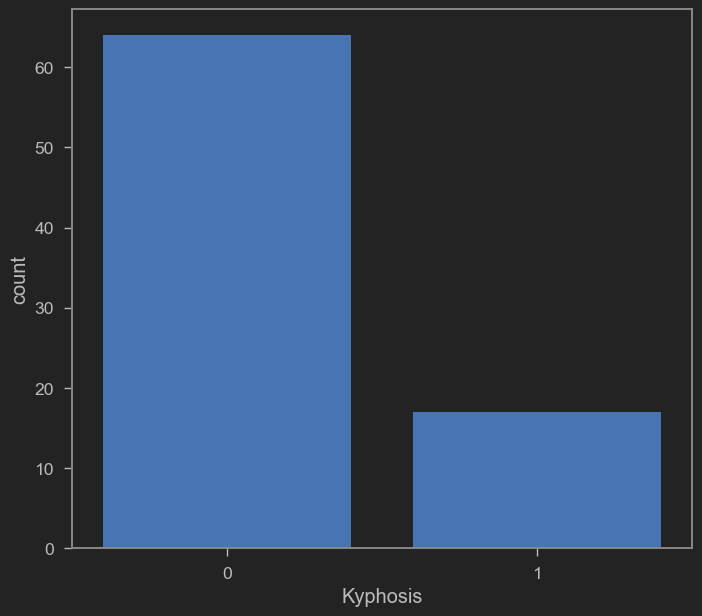

In [37]:
sns.countplot(x = Kyphosis_df['Kyphosis'])

In [38]:
x = Kyphosis_df.drop(['Kyphosis'], axis = 1) 
y = Kyphosis_df['Kyphosis']

In [55]:
x

,Age,Number,Start
0,71,3,5
1,158,3,14
2,128,4,5
3,2,5,1
4,1,4,15
...,...,...,...
76,157,3,13
77,26,7,13
78,120,2,13
79,42,7,6


In [39]:
y


0     0
1     0
2     1
3     0
4     0
     ..
76    1
77    0
78    0
79    1
80    0
Name: Kyphosis, Length: 81, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [42]:
x_train

,Age,Number,Start
52,139,10,6
35,93,3,16
73,206,4,10
45,139,3,10
71,127,4,12
...,...,...,...
24,15,7,2
56,2,3,13
0,71,3,5
47,131,5,13


In [43]:
x_test

,Age,Number,Start
28,4,3,16
27,100,3,14
21,105,6,5
78,120,2,13
19,27,4,9
23,131,2,3
10,82,5,14
40,73,5,1
75,178,4,15
69,15,5,16


In [44]:
x_train.shape

(64, 3)

In [45]:
x_test.shape

(17, 3)

In [46]:
y_train

52    1
35    0
73    0
45    1
71    0
     ..
24    1
56    0
0     0
47    0
67    0
Name: Kyphosis, Length: 64, dtype: int64

In [47]:
y_test

28    0
27    0
21    1
78    0
19    0
23    0
10    1
40    1
75    0
69    0
25    0
70    0
54    0
61    1
42    0
15    0
38    0
Name: Kyphosis, dtype: int64

In [48]:
y_train.shape

(64,)

In [49]:
y_test.shape

(17,)

In [50]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

<Axes: >

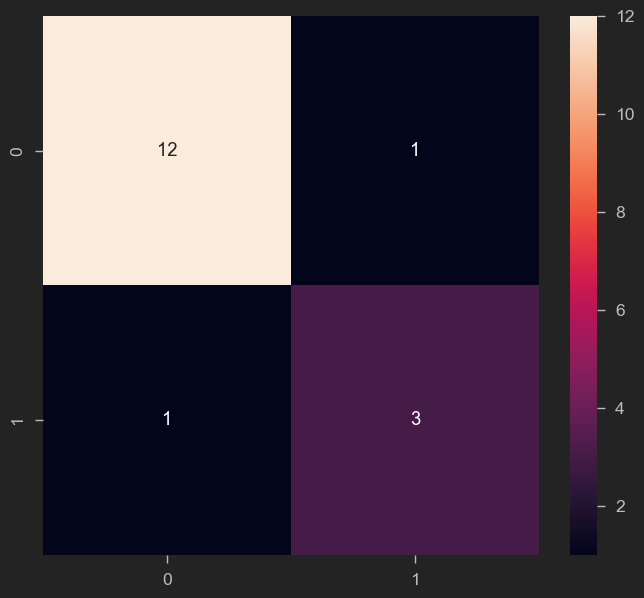

In [56]:
from sklearn.metrics import classification_report, confusion_matrix 
y_predict_test = model.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot = True)

In [57]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.75      0.75      0.75         4

    accuracy                           0.88        17
   macro avg       0.84      0.84      0.84        17
weighted avg       0.88      0.88      0.88        17



In [58]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier()

<Axes: >

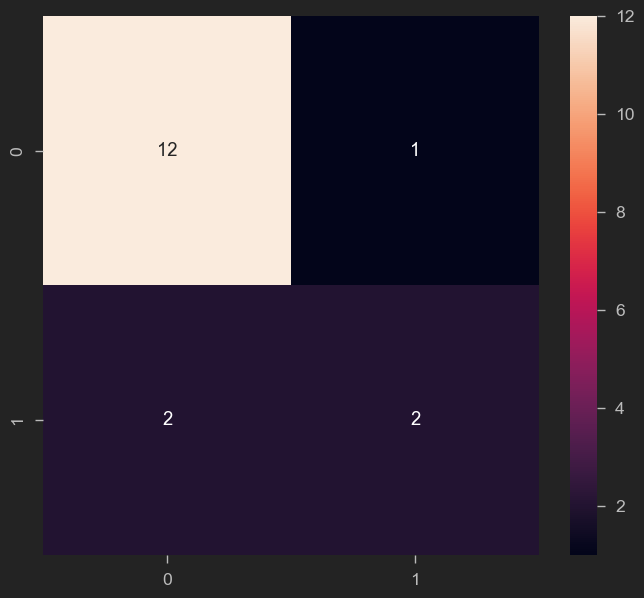

In [59]:
y_predict_test = decision_tree.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [60]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.67      0.50      0.57         4

    accuracy                           0.82        17
   macro avg       0.76      0.71      0.73        17
weighted avg       0.81      0.82      0.81        17



In [62]:
feature_importances = pd.DataFrame(decision_tree.feature_importances_,
                                   index = x_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

        importance
Age       0.448486
Start     0.338074
Number    0.213441


              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.50      0.50      0.50         4

    accuracy                           0.76        17
   macro avg       0.67      0.67      0.67        17
weighted avg       0.76      0.76      0.76        17



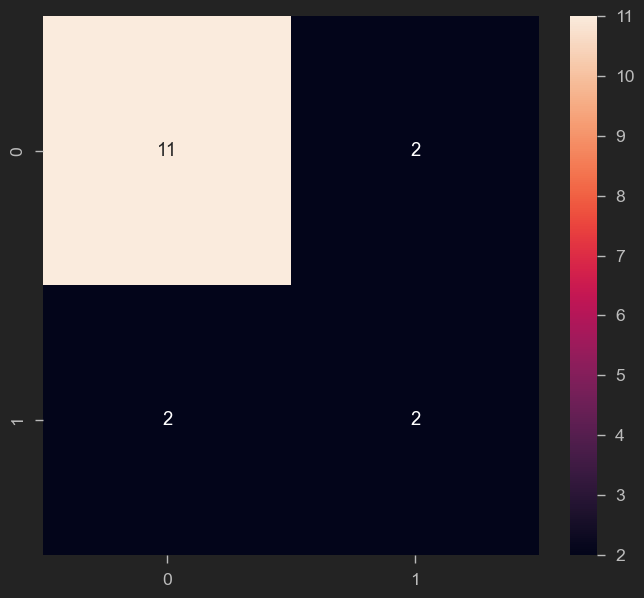

In [64]:
from sklearn.ensemble import RandomForestClassifier
RandomForest = RandomForestClassifier()
RandomForest.fit(x_train, y_train)

# Predicting the Test set results
y_predict_test = RandomForest.predict(x_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

print(classification_report(y_test, y_predict_test))